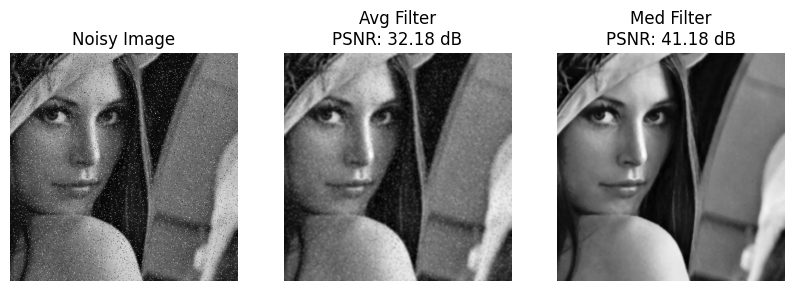

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Add salt & pepper noise
def add_noise(image, prob):
    noisy = image.copy()
    total_pixels = int(prob * image.size)
    for _ in range(total_pixels // 2):
        x, y = np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])
        noisy[x, y] = 255  # Salt
        x, y = np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])
        noisy[x, y] = 0    # Pepper
    return noisy

# Calculate PSNR
def psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    return float('inf') if mse == 0 else 20 * np.log10(255.0 / np.sqrt(mse))

# Load and process image
image = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))
noisy_image = add_noise(image, prob=0.05)

# Apply filters
avg_filtered = cv2.blur(noisy_image, (5, 5))
med_filtered = cv2.medianBlur(noisy_image, 5)

# Calculate PSNR
psnr_avg = psnr(image, avg_filtered)
psnr_med = psnr(image, med_filtered)

# Display results
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1), plt.imshow(noisy_image, cmap='gray'), plt.title("Noisy Image"), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(avg_filtered, cmap='gray'), plt.title(f"Avg Filter\nPSNR: {psnr_avg:.2f} dB"), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(med_filtered, cmap='gray'), plt.title(f"Med Filter\nPSNR: {psnr_med:.2f} dB"), plt.axis('off')
plt.show()
